<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** José Leonardo Aceves y Tania Bell Nicholls

**Fecha:** 23 de noviembre 2021.

**Expediente** : IF712626 y IF726767.
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/leonardoaceves/Tarea8_JLACEVES_TNICHOLLS.git

# Tarea 8: Clase 22

Replicar el procedimiento anterior para valoración de opciones 'call', pero en este caso para opciones tipo 'put' y además deben de comparar con los resultados teoricos del método de valuación de Black-Scholes (ecuación del principio de clase)

Código de solucion, Leonardo Aceves

In [2]:
#Paqueterias
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import yfinance as yf
from datetime import date

%matplotlib inline
#algunas opciones para Pandas
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

In [35]:
def options_yf(ticker):
    stock = yf.Ticker(ticker)
    calls, puts = stock.option_chain(stock.options[0]) 
    return calls, puts
c, p = options_yf("APPL")

In [ ]:
aapl = web.YahooOptions('AAPL')
aapl_opt = aapl.get_all_data().reset_index()
aapl_opt.set_index('Expiry')
aapl_opt.Underlying_Price[0]

In [ ]:
aapl_opt.loc[0, 'JSON']

In [ ]:
fecha1 = '2021-06-18'
fecha2 = '2022-09-16'
put06_f1 = aapl_opt.loc[(aapl_opt.Expiry==fecha1) & (aapl_opt.Type=='put')]
ax = put06_f1.set_index('Strike').loc[:, 'IV'].plot(figsize=(8,6))
ax.axvline(put06_f1.Underlying_Price.iloc[0], color='g')

# Código de solución estudiante 2: Tania Bell

### Importación de closes y opciones

In [56]:
# Función para descargar precios de cierre ajustados:
def get_adj_closes(tickers, start_date=None, end_date=None):
    '''
    Función que accede a los datos en yahoo dado tickers y la fecha de inicio y la fecha final
    '''
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

# Función para cálcular los rendimientos diarios
def calc_daily_ret(closes):
    '''
    Función para calcular los rendimientos diarios de cierres de acciones
    '''
    return np.log(closes/closes.shift(1)).iloc[1:]

# Función opciones
def options_chain(symbol):
    '''
    Función que obtiene los datos de yahoo finance usando yfinance dando un ticker
    '''
    tk = yf.Ticker(symbol)
    # Expiration dates
    exps = tk.options

    # Get options for each expiration
    options = pd.DataFrame()
    for e in exps:
        opt = tk.option_chain(e)
        opt = pd.DataFrame().append(opt.calls).append(opt.puts)
        opt['expirationDate'] = e
        options = options.append(opt, ignore_index=True)

    # Bizarre error in yfinance that gives the wrong expiration date
    # Add 1 day to get the correct expiration date
    options['expirationDate'] = pd.to_datetime(options['expirationDate']) + datetime.timedelta(days = 1)
    options['dte'] = (options['expirationDate'] - datetime.datetime.today()).dt.days / 365
    
    # Boolean column if the option is a CALL
    options['CALL'] = options['contractSymbol'].str[4:].apply(
        lambda x: "C" in x)
    
    options[['bid', 'ask', 'strike']] = options[['bid', 'ask', 'strike']].apply(pd.to_numeric)
    options['mark'] = (options['bid'] + options['ask']) / 2 # Calculate the midpoint of the bid-ask
    
    # Drop unnecessary and meaningless columns
    options = options.drop(columns = ['contractSize', 'currency', 'change', 'percentChange', 'lastTradeDate', 'lastPrice'])

    return options

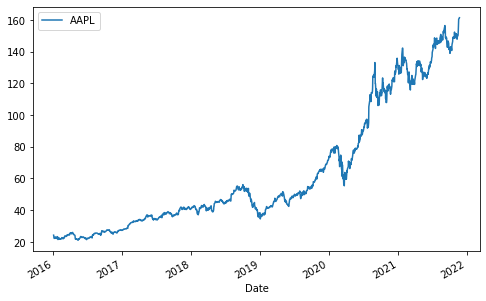

In [4]:
# importamos cierres diarios de la empresa
ticker = ['AAPL']
start_date = '2016-01-01'

closes_aapl = get_adj_closes(ticker, start_date)
closes_aapl.plot(figsize=(8,5));
plt.legend(ticker);

In [5]:
#ultimo cierre de la empresa
closes_aapl.iloc[-1]

Symbols
AAPL    161.41
Name: 2021-11-23 00:00:00, dtype: float64

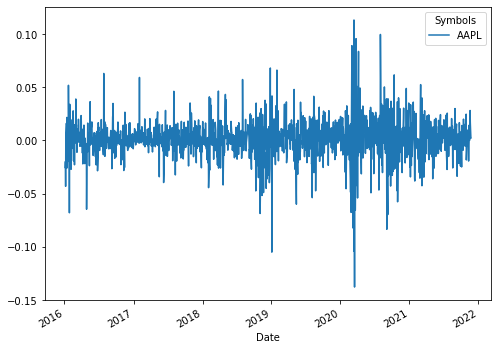

In [7]:
# calculamos los rendimientos diarios
ret_aapl = calc_daily_ret(closes_aapl)
ret_aapl.plot(figsize=(8,6));

In [9]:
#importamos información de opciones de la empresa para escoger nuestro put
aapl_opt = options_chain('AAPL')
#aapl_opt = aapl_opt.set_index('expirationDate').sort_index()
aapl_opt

contractSymbol  strike     bid  ...    dte   CALL     mark
0     AAPL211126C00075000    75.0   86.00  ...  0.008   True   86.475
1     AAPL211126C00080000    80.0   81.35  ...  0.008   True   81.650
2     AAPL211126C00085000    85.0   76.20  ...  0.008   True   76.425
3     AAPL211126C00090000    90.0   71.20  ...  0.008   True   71.625
4     AAPL211126C00095000    95.0   66.15  ...  0.008   True   66.425
...                   ...     ...     ...  ...    ...    ...      ...
1928  AAPL240119P00235000   235.0   78.00  ...  2.156  False   80.500
1929  AAPL240119P00240000   240.0   82.50  ...  2.156  False   85.000
1930  AAPL240119P00245000   245.0   87.00  ...  2.156  False   89.500
1931  AAPL240119P00250000   250.0   91.50  ...  2.156  False   93.750
1932  AAPL240119P00260000   260.0  100.50  ...  2.156  False  102.750

[1933 rows x 12 columns]

In [11]:
# opción que quiero evaluar
K = 175.0 # strike price
indice_opt = aapl_opt.loc[(aapl_opt.CALL==False) & (aapl_opt.strike==K) &(aapl_opt.expirationDate=='2021-12-24')]
indice_opt

contractSymbol  strike   bid  ...    dte   CALL  mark
426  AAPL211223P00175000   175.0  14.5  ...  0.082  False  14.6

[1 rows x 12 columns]

In [12]:
# información de opción elegida
i_opt= indice_opt.index
opcion_valuar = aapl_opt.loc[i_opt[0]]
opcion_valuar

contractSymbol    AAPL211223P00175000
strike                          175.0
bid                              14.5
ask                              14.7
volume                            7.0
                         ...         
inTheMoney                       True
expirationDate    2021-12-24 00:00:00
dte                             0.082
CALL                            False
mark                             14.6
Name: 426, Length: 12, dtype: object

## Simulación de precios

In [13]:
# rendimiento simple en dataframe
Ri = closes_aapl.pct_change(1).iloc[1:]
# Obtenemos su media y desviación estándar de los rendimientos
mu_R = Ri.mean()[0]
sigma_R = Ri.std()[0]
Ri

Symbols      AAPL
Date             
2016-01-05 -0.025
2016-01-06 -0.020
2016-01-07 -0.042
2016-01-08  0.005
2016-01-11  0.016
...           ...
2021-11-17  0.016
2021-11-18  0.029
2021-11-19  0.017
2021-11-22  0.003
2021-11-23  0.002

[1484 rows x 1 columns]

In [14]:
today = pd.Timestamp(date.today())
expiry = '2022-02-18'

nscen = 10000
dates = pd.date_range(start=today, end=expiry, freq='B')
ndays = len(dates)
dates, ndays

(DatetimeIndex(['2021-11-23', '2021-11-24', '2021-11-25', '2021-11-26',
                '2021-11-29', '2021-11-30', '2021-12-01', '2021-12-02',
                '2021-12-03', '2021-12-06', '2021-12-07', '2021-12-08',
                '2021-12-09', '2021-12-10', '2021-12-13', '2021-12-14',
                '2021-12-15', '2021-12-16', '2021-12-17', '2021-12-20',
                '2021-12-21', '2021-12-22', '2021-12-23', '2021-12-24',
                '2021-12-27', '2021-12-28', '2021-12-29', '2021-12-30',
                '2021-12-31', '2022-01-03', '2022-01-04', '2022-01-05',
                '2022-01-06', '2022-01-07', '2022-01-10', '2022-01-11',
                '2022-01-12', '2022-01-13', '2022-01-14', '2022-01-17',
                '2022-01-18', '2022-01-19', '2022-01-20', '2022-01-21',
                '2022-01-24', '2022-01-25', '2022-01-26', '2022-01-27',
                '2022-01-28', '2022-01-31', '2022-02-01', '2022-02-02',
                '2022-02-03', '2022-02-04', '2022-02-07', '2022-

### Simular precios usando rendimiento

In [15]:
dt = 1; # Rendimiento diario 
Z = np.random.randn(ndays,nscen)  # Z ~ N(0,1)
# Simulación normal de los rendimientos
Ri_dt = pd.DataFrame(mu_R*dt+Z*sigma_R*np.sqrt(dt),index=dates)
Ri_dt.cumprod()

0           1           2     ...        9997        9998  \
2021-11-23  -1.682e-03   6.874e-04   9.239e-03  ...  -1.070e-02   1.479e-03   
2021-11-24  -3.285e-06   1.256e-05   4.364e-05  ...   1.912e-04  -1.459e-06   
2021-11-25  -3.861e-08   4.631e-07   1.717e-07  ...   4.724e-06  -2.189e-08   
2021-11-26  -9.355e-10   7.037e-09  -7.649e-10  ...  -5.374e-08   4.404e-10   
2021-11-29  -4.074e-12  -1.241e-10  -7.838e-13  ...  -9.552e-10   1.639e-11   
...                ...         ...         ...  ...         ...         ...   
2022-02-14 -3.617e-121 -2.873e-122 -3.953e-119  ... -2.077e-115  2.997e-117   
2022-02-15  1.721e-122  1.177e-124 -6.120e-122  ...  9.129e-117  6.067e-119   
2022-02-16  2.997e-124  5.199e-127  1.707e-123  ... -4.790e-119 -4.185e-121   
2022-02-17  2.649e-126  1.497e-128 -1.166e-125  ...  6.730e-121 -1.392e-122   
2022-02-18 -4.637e-128  3.971e-130 -3.791e-127  ...  1.372e-122 -1.141e-124   

                  9999  
2021-11-23   2.719e-03  
2021-11-24   1.614e-05  
2021-11-25  -2.871e-07  
2021-11-26   2.361e-09  
2021-11-29  -2.002e-11  
...                ...  
2022-02-14 -8.624e-125  
2022-02-15  1.503e-126  
2022-02-16 -6.250e-129  
2022-02-17 -1.869e-130  
2022-02-18 -2.574e-133  

[64 rows x 10000 columns]

In [16]:
# simulacion del precio
S_0 = closes_aapl.iloc[-1,0]
S_T = S_0*(1+Ri_dt).cumprod()

#pd.concat([closes_aapl,S_T]).plot(figsize=(8,6));
#plt.title('Simulación de precios usando rendimiento simple');
S_T

0        1        2     ...     9997     9998     9999
2021-11-23  161.139  161.521  162.901  ...  159.683  161.649  161.849
2021-11-24  161.453  164.472  163.671  ...  156.830  161.489  162.809
2021-11-25  163.351  170.537  164.315  ...  160.705  163.913  159.912
2021-11-26  167.309  173.128  163.583  ...  158.877  160.616  158.597
2021-11-29  168.037  170.074  163.751  ...  161.701  166.592  157.252
...             ...      ...      ...  ...      ...      ...      ...
2022-02-14  221.553  236.324  172.115  ...  180.856  163.945  140.736
2022-02-15  211.011  235.356  172.382  ...  172.906  167.263  138.284
2022-02-16  214.686  236.396  167.574  ...  171.998  166.110  137.709
2022-02-17  216.583  243.202  166.429  ...  169.582  171.634  141.826
2022-02-18  212.793  249.654  171.840  ...  173.038  173.042  142.022

[64 rows x 10000 columns]

### Rendimiento Logaritmico

In [17]:
ri = calc_daily_ret(closes_aapl)
# Usando la media y desviación estándar de los rendimientos logarítmicos
mu_r = ri.mean()[0]
sigma_r = ri.std()[0]

# # Usando la equivalencia teórica
# mu_r2 = mu_R - (sigma_R**2)/2

sim_ret_ri = pd.DataFrame(mu_r*dt+Z*sigma_r*np.sqrt(dt), index=dates)

# Simulación del precio
S_0 = closes_aapl.iloc[-1,0]
S_T2 = S_0*np.exp(sim_ret_ri.cumsum())

# Se muestran los precios simulados con los precios descargados
# pd.concat([closes_aapl,S_T2]).plot(figsize=(8,6));
# plt.title('Simulación de precios usando rendimiento logarítmico');

# from sklearn.metrics import mean_absolute_error
e1 = np.abs(S_T-S_T2).mean().mean()
e1

0.17756258924237078

In [18]:
# simulación de precios con rendimiento logarítmico
S_T2.iloc[0, :] = closes_aapl.iloc[-1]
S_T2

0        1        2     ...     9997     9998     9999
2021-11-23  161.410  161.410  161.410  ...  161.410  161.410  161.410
2021-11-24  161.398  164.446  163.625  ...  156.805  161.434  162.758
2021-11-25  163.280  170.599  164.242  ...  160.704  163.849  159.857
2021-11-26  167.259  173.183  163.483  ...  158.857  160.555  158.519
2021-11-29  167.960  170.123  163.623  ...  161.681  166.618  157.152
...             ...      ...      ...  ...      ...      ...      ...
2022-02-14  222.033  236.242  172.490  ...  180.660  163.927  140.454
2022-02-15  211.670  235.235  172.728  ...  172.854  167.253  138.002
2022-02-16  215.354  236.237  167.944  ...  171.918  166.074  137.405
2022-02-17  217.231  243.101  166.770  ...  169.488  171.666  141.555
2022-02-18  213.421  249.600  172.256  ...  172.951  173.050  141.726

[64 rows x 10000 columns]

In [19]:
print('Las std usando rendimientos logarítmicos y simples son similares')
sigma_R,sigma_r

Las std usando rendimientos logarítmicos y simples son similares


(0.018496190869577645, 0.018513767814433556)

#### Encontrar el valor de la opción según la función de pago correspondiente

$$ P(S(t),t)=max\{K-S(T),0\} \rightarrow \text{En el caso de Put}$$ 


Prima    8.517
Name: 2022-02-18 00:00:00, dtype: float64

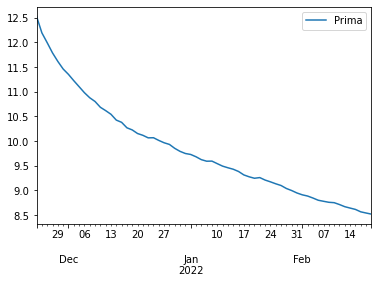

In [20]:
# cálculo de la prima que se necesita pagar para obtener put
put = pd.DataFrame({'Prima':np.exp(-mu_r*ndays) \
              *np.fmax(K-S_T2, 0).mean(axis=1)}, index=dates)
put.plot();
put.iloc[-1]

### Valuación usando simulación: modelo normal para los rendimientos

In [21]:
# Hallar media y desviación estándar muestral de los rendimientos logarítmicos
mu = ret_aapl.mean()[0]
sigma = ret_aapl.std()[0]
mu, sigma

(0.0012772721649051066, 0.018513767814433556)

In [22]:
# Tasa de bonos de 1 yr de fecha 19/11/21 -> 0.18%
r = 0.0018/360 # Tasa diaria

In [23]:
#Simularemos el tiempo de contrato desde HOY hasta la fecha de Expiry
today = pd.Timestamp(date.today())
expiry = pd.to_datetime('2022-02-18')

nscen = 10
dates = pd.date_range(start=today, end = expiry, freq='B')
ndays = len(dates)
dates

DatetimeIndex(['2021-11-23', '2021-11-24', '2021-11-25', '2021-11-26',
               '2021-11-29', '2021-11-30', '2021-12-01', '2021-12-02',
               '2021-12-03', '2021-12-06', '2021-12-07', '2021-12-08',
               '2021-12-09', '2021-12-10', '2021-12-13', '2021-12-14',
               '2021-12-15', '2021-12-16', '2021-12-17', '2021-12-20',
               '2021-12-21', '2021-12-22', '2021-12-23', '2021-12-24',
               '2021-12-27', '2021-12-28', '2021-12-29', '2021-12-30',
               '2021-12-31', '2022-01-03', '2022-01-04', '2022-01-05',
               '2022-01-06', '2022-01-07', '2022-01-10', '2022-01-11',
               '2022-01-12', '2022-01-13', '2022-01-14', '2022-01-17',
               '2022-01-18', '2022-01-19', '2022-01-20', '2022-01-21',
               '2022-01-24', '2022-01-25', '2022-01-26', '2022-01-27',
               '2022-01-28', '2022-01-31', '2022-02-01', '2022-02-02',
               '2022-02-03', '2022-02-04', '2022-02-07', '2022-02-08',
      

In [24]:
# Generamos 10 escenarios de rendimientos simulados y guardamos en un dataframe
sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r, index=dates)
sim_ret.cumsum()
# Las columnas son los escenarios y las filas son las días de contrato

0      1      2  ...      7      8      9
2021-11-23  3.140e-02  0.012  0.023  ... -0.004 -0.019 -0.028
2021-11-24  1.292e-02  0.005  0.016  ... -0.032  0.004 -0.018
2021-11-25 -8.395e-03 -0.057  0.035  ... -0.027  0.005 -0.010
2021-11-26 -4.989e-04 -0.055  0.026  ... -0.006 -0.019 -0.014
2021-11-29  3.442e-03 -0.045  0.081  ...  0.028 -0.052 -0.014
...               ...    ...    ...  ...    ...    ...    ...
2022-02-14  2.330e-01 -0.159  0.006  ... -0.019  0.042  0.207
2022-02-15  2.027e-01 -0.183  0.006  ... -0.013  0.034  0.205
2022-02-16  2.104e-01 -0.183 -0.006  ... -0.006  0.046  0.197
2022-02-17  2.080e-01 -0.188 -0.025  ... -0.005  0.051  0.188
2022-02-18  2.058e-01 -0.208 -0.021  ...  0.029  0.063  0.203

[64 rows x 10 columns]

In [25]:
# Con los rendimientos simulados, calcular los escenarios de precios respectivos:
S0 = closes_aapl.iloc[-1,0]  # Condición inicial del precio a simular
sim_closes = S0*np.exp(sim_ret.cumsum())
sim_closes

0        1        2  ...        7        8        9
2021-11-23  166.559  163.327  165.210  ...  160.786  158.325  156.918
2021-11-24  163.509  162.272  163.983  ...  156.280  162.103  158.470
2021-11-25  160.061  152.509  167.076  ...  157.057  162.181  159.760
2021-11-26  161.329  152.741  165.635  ...  160.448  158.438  159.208
2021-11-29  161.967  154.350  174.993  ...  166.045  153.203  159.238
...             ...      ...      ...  ...      ...      ...      ...
2022-02-14  203.768  137.727  162.413  ...  158.412  168.374  198.533
2022-02-15  197.689  134.456  162.370  ...  159.254  166.985  198.104
2022-02-16  199.216  134.367  160.431  ...  160.421  169.053  196.641
2022-02-17  198.730  133.711  157.395  ...  160.588  169.937  194.711
2022-02-18  198.289  131.086  158.032  ...  166.117  171.928  197.765

[64 rows x 10 columns]

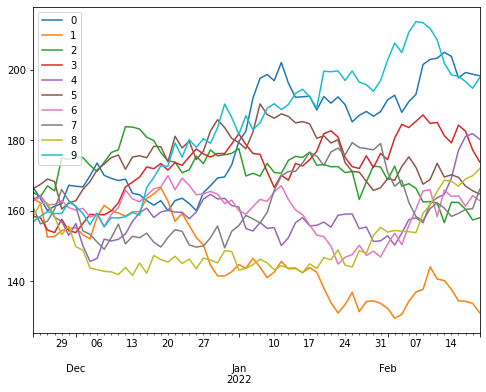

In [26]:
# visualizamos las simulaciones de precios
sim_closes.plot(figsize=(8,6));

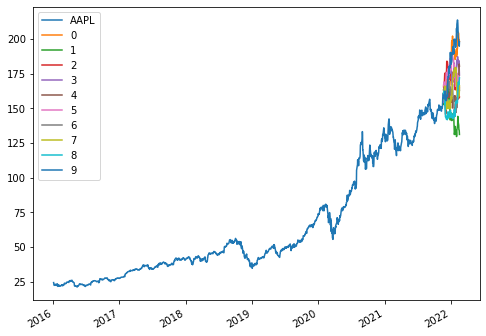

In [30]:
# Se muestran los precios simulados con los precios descargados
pd.concat([closes_aapl,sim_closes]).plot(figsize=(8,6));


In [31]:
Hoy = date.today()
nscen = 100000
dates = pd.date_range(start= Hoy, periods = ndays)
ndays = len(dates)
S0 = closes_aapl.iloc[-1,0]  # Condición inicial del precio a simular

sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)
sim_closes = S0*np.exp(sim_ret.cumsum())
#strike = pd.DataFrame({'Strike':K*np.ones(ndays)}, index=dates)
#simul = pd.concat([closes_aapl.T,strike.T,sim_closes.T]).T
#simul.plot(figsize=(8,6),legend=False);
sim_closes

0        1        2      ...    99997    99998    99999
2021-11-23  157.664  153.669  163.508  ...  154.317  158.894  160.108
2021-11-24  153.753  157.505  166.493  ...  154.126  163.152  160.205
2021-11-25  153.521  155.434  163.151  ...  149.565  159.095  159.462
2021-11-26  152.672  154.518  165.475  ...  151.707  156.479  163.887
2021-11-27  153.900  153.068  166.768  ...  148.217  157.847  166.710
...             ...      ...      ...  ...      ...      ...      ...
2022-01-21  158.050  165.239  151.944  ...  133.524  194.781  133.303
2022-01-22  156.203  166.838  153.222  ...  138.418  194.115  132.678
2022-01-23  156.426  164.549  155.184  ...  140.200  188.442  134.492
2022-01-24  155.774  161.964  153.391  ...  138.440  186.746  135.595
2022-01-25  156.249  161.648  152.075  ...  136.647  182.851  135.304

[64 rows x 100000 columns]

In [32]:
sim_closes.iloc[0, :] = closes_aapl.iloc[-1]
sim_closes

0        1        2      ...    99997    99998    99999
2021-11-23  161.410  161.410  161.410  ...  161.410  161.410  161.410
2021-11-24  153.753  157.505  166.493  ...  154.126  163.152  160.205
2021-11-25  153.521  155.434  163.151  ...  149.565  159.095  159.462
2021-11-26  152.672  154.518  165.475  ...  151.707  156.479  163.887
2021-11-27  153.900  153.068  166.768  ...  148.217  157.847  166.710
...             ...      ...      ...  ...      ...      ...      ...
2022-01-21  158.050  165.239  151.944  ...  133.524  194.781  133.303
2022-01-22  156.203  166.838  153.222  ...  138.418  194.115  132.678
2022-01-23  156.426  164.549  155.184  ...  140.200  188.442  134.492
2022-01-24  155.774  161.964  153.391  ...  138.440  186.746  135.595
2022-01-25  156.249  161.648  152.075  ...  136.647  182.851  135.304

[64 rows x 100000 columns]

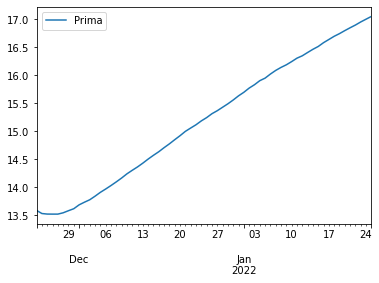

In [33]:
# se calcula la prima que se tiene que pagar para el put
put = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(K-sim_closes, 0).mean(axis=1)}, index=dates)
put.plot();


In [34]:
#La valuación de la opción es
put.iloc[-1]

Prima    17.044
Name: 2022-01-25 00:00:00, dtype: float64

In [35]:
# Intervalo de confianza del 99%
confianza = 0.99
sigma_est = sim_closes.iloc[-1].sem()
mean_est = put.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)
print(i2)

(16.845882030713238, 17.241911605074687)
(16.84588581030287, 17.241907825485054)


### Precios simulados usando técnicas de reducción de varianza

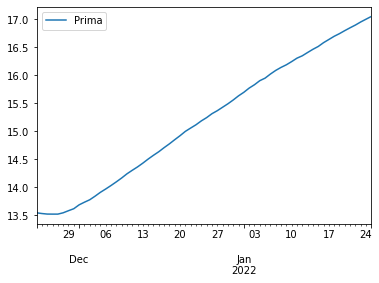

In [36]:
# Usando muestreo estratificado----> #estratros = nscen
U = (np.arange(0,nscen)+np.random.rand(ndays,nscen))/nscen
Z = st.norm.ppf(U)

sim_ret2 = pd.DataFrame(sigma*Z+r,index=dates)
sim_closes2 = S0*np.exp(sim_ret.cumsum())

# Función de pago
strike = pd.DataFrame(K*np.ones([ndays,nscen]), index=dates)
put = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(strike-sim_closes2,np.zeros([ndays,nscen])).T.mean()}, index=dates)
put.plot();

In [37]:
#La valuación de la opción es:
put.iloc[-1]

Prima    17.044
Name: 2022-01-25 00:00:00, dtype: float64

In [38]:
# intervalo de confianza 99%
confianza = 0.99
sigma_est = sim_closes2.iloc[-1].sem()
mean_est = put.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)
print(i1)


(16.845882030713238, 17.241911605074687)
(16.845882030713238, 17.241911605074687)


### Análisis de la distribución de los rendimientos

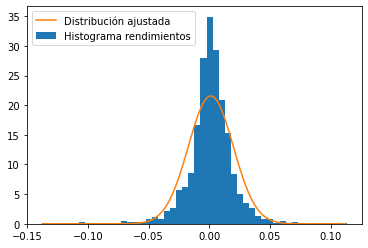

In [39]:
# ajustando norm
ren = calc_daily_ret(closes_aapl) # rendimientos 
y,x,des = plt.hist(ren['AAPL'],bins=50,density=True,label='Histograma rendimientos')

mu_fit,sd_fit = st.norm.fit(ren) # Se ajustan los parámetros de una normal
# Valores máximo y mínimo de los rendiemientos a generar
ren_max = max(x);ren_min = min(x)
# Vector de rendimientos generados
ren_gen = np.arange(ren_min,ren_max,0.001)
# Generación de la normal ajustado con los parámetros encontrados
curve_fit = st.norm.pdf(ren_gen,loc=mu_fit,scale=sd_fit)
plt.plot(ren_gen,curve_fit,label='Distribución ajustada')
plt.legend()
plt.show()


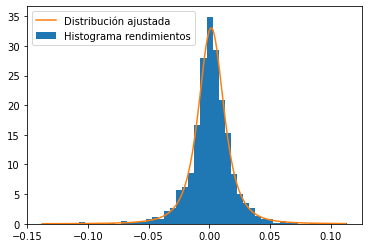

In [40]:
# ajustando t
ren = calc_daily_ret(closes_aapl) # rendimientos 
y,x,des = plt.hist(ren['AAPL'],bins=50,density=True,label='Histograma rendimientos')

dof,mu_fit,sd_fit = st.t.fit(ren.values) # Se ajustan los parámetros de una normal
# Valores máximo y mínimo de los rendiemientos a generar
# ren_max = max(x);ren_min = min(x)
# Vector de rendimientos generados
ren_gen = np.arange(ren_min,ren_max,0.001)
# Generación de la normal ajustado con los parámetros encontrados
curve_fit = st.t.pdf(ren_gen, df=dof,loc=mu_fit,scale=sd_fit)
plt.plot(ren_gen,curve_fit,label='Distribución ajustada')
plt.legend()
plt.show()

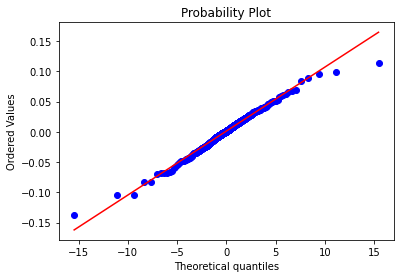

In [41]:
st.probplot(ren['AAPL'],sparams= dof, dist='t', plot=plt);

### Valuación usando simulación: uso del histograma de rendimientos

In [42]:
# cantidad de días y número de escenarios de simulación
ndays = 109 
nscen = 10

In [43]:
#las probabilidades de ocurrencia, lo que se llamó como variable y
prob = y/np.sum(y)
values = x[1:]

In [44]:
#generamos los números aleatorios correspondientes a los rendimientos (tantos como días por número de escenarios).
ret = np.random.choice(values, ndays*nscen, p=prob)
dates = pd.date_range(start=Hoy,periods=ndays)
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_ret_hist

0      1      2  ...      7      8      9
2021-11-23 -0.012  0.058  0.018  ... -0.007  0.008  0.038
2021-11-24  0.008 -0.022 -0.017  ...  0.063 -0.007  0.003
2021-11-25  0.018  0.008  0.003  ...  0.008  0.003 -0.007
2021-11-26  0.018  0.038 -0.002  ...  0.018 -0.027  0.018
2021-11-27  0.013 -0.022 -0.007  ...  0.003  0.003  0.003
...           ...    ...    ...  ...    ...    ...    ...
2022-03-07  0.008  0.018 -0.012  ...  0.003  0.018  0.008
2022-03-08 -0.002  0.013  0.003  ...  0.028 -0.007  0.003
2022-03-09  0.103  0.018 -0.012  ...  0.008  0.008  0.003
2022-03-10  0.003  0.013  0.008  ...  0.003  0.013  0.008
2022-03-11  0.023  0.003  0.008  ... -0.002 -0.022 -0.002

[109 rows x 10 columns]

In [45]:
sim_closes_hist = (closes_aapl.iloc[-1,0])*np.exp(sim_ret_hist.cumsum())
sim_closes_hist

0        1        2  ...        7        8        9
2021-11-23  159.441  171.043  164.314  ...  160.243  162.673  167.644
2021-11-24  160.688  167.269  161.497  ...  170.660  161.497  168.111
2021-11-25  163.579  168.578  161.946  ...  171.996  161.946  166.895
2021-11-26  166.521  175.089  161.583  ...  175.089  157.580  169.897
2021-11-27  168.668  171.226  160.415  ...  175.576  158.018  170.370
...             ...      ...      ...  ...      ...      ...      ...
2022-03-07  192.501  174.998  251.143  ...  221.537  269.418  327.648
2022-03-08  192.070  177.254  251.841  ...  227.796  267.469  328.559
2022-03-09  212.935  180.443  248.768  ...  229.579  269.562  329.472
2022-03-10  213.527  182.769  250.715  ...  230.217  273.038  332.050
2022-03-11  218.461  183.278  252.677  ...  229.702  267.014  331.307

[109 rows x 10 columns]

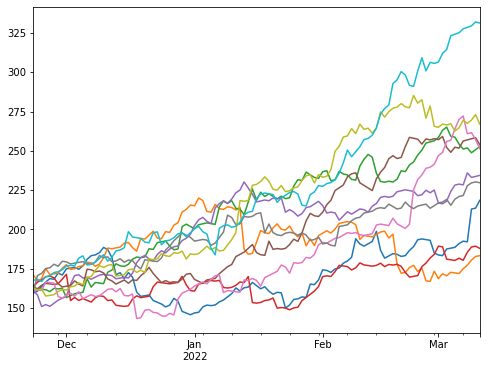

In [46]:
sim_closes_hist.plot(figsize=(8,6),legend=False);

Text(0.5, 1.0, 'Simulación usando el histograma de los rendimientos')

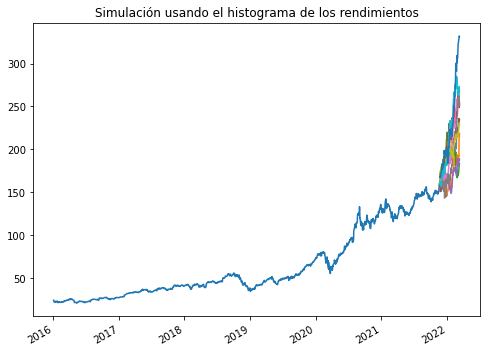

In [47]:
pd.concat([closes_aapl,sim_closes_hist]).plot(figsize=(8,6),legend=False);
plt.title('Simulación usando el histograma de los rendimientos')

In [48]:
ndays = 109
nscen = 10000
freq, values = np.histogram(ret_aapl+r-mu, bins=2000)
prob = freq/np.sum(freq)
ret=np.random.choice(values[1:],ndays*nscen,p=prob)
dates=pd.date_range('2018-10-29',periods=ndays)
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_closes_hist = (closes_aapl.iloc[-1,0])*np.exp(sim_ret_hist.cumsum())

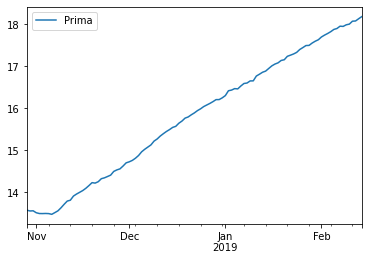

In [49]:
strike = pd.DataFrame(K*np.ones(ndays*nscen).reshape((ndays,nscen)), index=dates)
put_hist = pd.DataFrame({'Prima':np.exp(-r*ndays)*np.fmax(strike-sim_closes_hist,np.zeros(ndays*nscen).reshape((ndays,nscen))).T.mean()}, index=dates)
put_hist.plot();

In [50]:
put_hist.iloc[-1]

Prima    18.182
Name: 2019-02-14 00:00:00, dtype: float64

In [51]:
confianza = 0.95
sigma_est = sim_closes_hist.iloc[-1].sem()
mean_est = put_hist.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)
print(i1)


(17.54896712033981, 18.814639213799396)
(17.54896712033981, 18.814639213799396)


Para la prima de la opción de Apple tenemos varias opciones ya que lo calculamos de diferentes maneras:
 - Valuación usando simulación: uso del histograma de rendimientos -> 18.182
 - Rendimiento Logaritmico -> 18.182
 - Valuación usando simulación: modelo normal para los rendimientos -> 17.044
 - Precios simulados usando técnicas de reducción de varianza -> 17.044

Concluimos que se debería de tomar 17.004 como la prima. Como se usó un intervalo de confianza del 99% entonces los resultados son aceptables.

## Resultados teoricos del método de valuación de Black-Scholes

In [52]:
Hoy = date.today()

dates = pd.date_range(start= Hoy, periods = ndays, freq='B')

ndays = len(dates)
nscen = 100000

S0 = closes_aapl.iloc[-1]  
sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)
sim_closes = S0[0]*np.exp(sim_ret.cumsum())

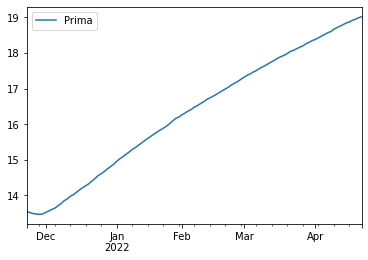

In [53]:
strike = pd.DataFrame(K*np.ones([ndays,nscen]), index=dates)
#put usando black scholes
put = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(strike-sim_closes,0).mean(axis=1)}, index=dates)
put.plot();

In [54]:
put.iloc[-1]

Prima    19.021
Name: 2022-04-22 00:00:00, dtype: float64

In [55]:
confianza = 0.99
sigma_est = sim_closes.iloc[-1].sem()
mean_est = put.iloc[-1].Prima
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i2)

(18.760430249517107, 19.282414237992434)


Con un nivel de confianza de 0.99 obtuvimos que la prima deberia de ser 19.021 con el metodo de los resultados teoricos del black scholes.

Podemos concluir que la prima para nuestra opción puede estar en el rango de 17.044 y 19.2824.